# Taha Laroussi, deniere modification : 11/12/19

# import libraries for data manipulaion

In [129]:
import pandas as pd # dataframe
import numpy as np # array


In [130]:
# command line

!head -n 100 ./supplementaryMaterial1.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


# Lecture des fichiers

In [131]:
## enlever les double espaces et triple espace
with open("./supplementaryMaterial0.csv", mode='r') as file:
    txt=file.read()
    txt=txt.replace("  ", " ")
with open("./supplementaryMaterial0.csv", mode='w') as file:
    file.write(txt)

with open("./supplementaryMaterial1.csv", mode='r') as file:
    txt=file.read()
    txt=txt.replace("  ", " ").replace("   ", " ")
with open("./supplementaryMaterial1.csv", mode='w') as file:
    file.write(txt)

In [154]:
cols = ['Reynolds number',
 'Bare tube diameter',
 'Fin height',
 'Fraction of fin height which is serrated',
 'Aperture between fins',
 'Fin tip-to-tip',
 'Numerically computed fin efficiency',
 'Transferred heat, fin area',
 'Transferred heat, bare tube area ',
 'Bulk temperature in',
 'Bulk temperature, out ',
 'Euler number',
 'NuPr']

In [155]:
df = pd.read_csv("./supplementaryMaterial0.csv", skiprows=16, sep=' ', header=None, names=cols)

In [156]:
df_test=pd.read_csv("./supplementaryMaterial1.csv", skiprows=29, sep=' ',header=None, names=cols)

In [157]:
df.head()

,Reynolds number,Bare tube diameter,Fin height,Fraction of fin height which is serrated,Aperture between fins,Fin tip-to-tip,Numerically computed fin efficiency,"Transferred heat, fin area","Transferred heat, bare tube area",Bulk temperature in,"Bulk temperature, out",Euler number,NuPr
0,5598.842923,38.050000,14.6000,0.390,2.2450,4.05,0.766054,2.331958,0.139473,315.886064,306.526348,1.789857,64.121450
1,6463.062391,17.000000,18.4000,1.000,1.0500,0.60,0.335254,2.078704,0.040821,317.551916,311.452741,2.317435,83.565213
2,2000.006289,37.000000,22.1000,0.210,0.7100,2.50,0.812148,0.363164,0.000258,307.063115,298.754972,22.996801,20.487687
3,1421.189643,28.090000,9.3425,0.000,3.1550,6.89,0.891836,0.845530,0.084156,316.560078,307.105294,1.658460,28.781982
4,980.827381,14.914818,5.3400,0.375,1.4665,3.36,0.964580,0.365255,0.016127,313.524052,302.660292,2.319980,27.835945


# Merge Both Data-Sets into a big one

In [158]:
df_total = pd.concat([df, df_test])

In [159]:
df_total.shape, df.shape, df_test.shape

((85, 13), (68, 13), (17, 13))

## do we have missing values ?

In [160]:
import matplotlib.pyplot as plt # base library for vizualisation
import seaborn as sns # extension for beautiful vizualisation

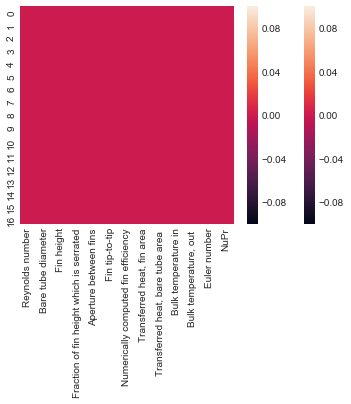

In [161]:
sns.heatmap(df.isna())
sns.heatmap(df_test.isna())

# Check Correlations

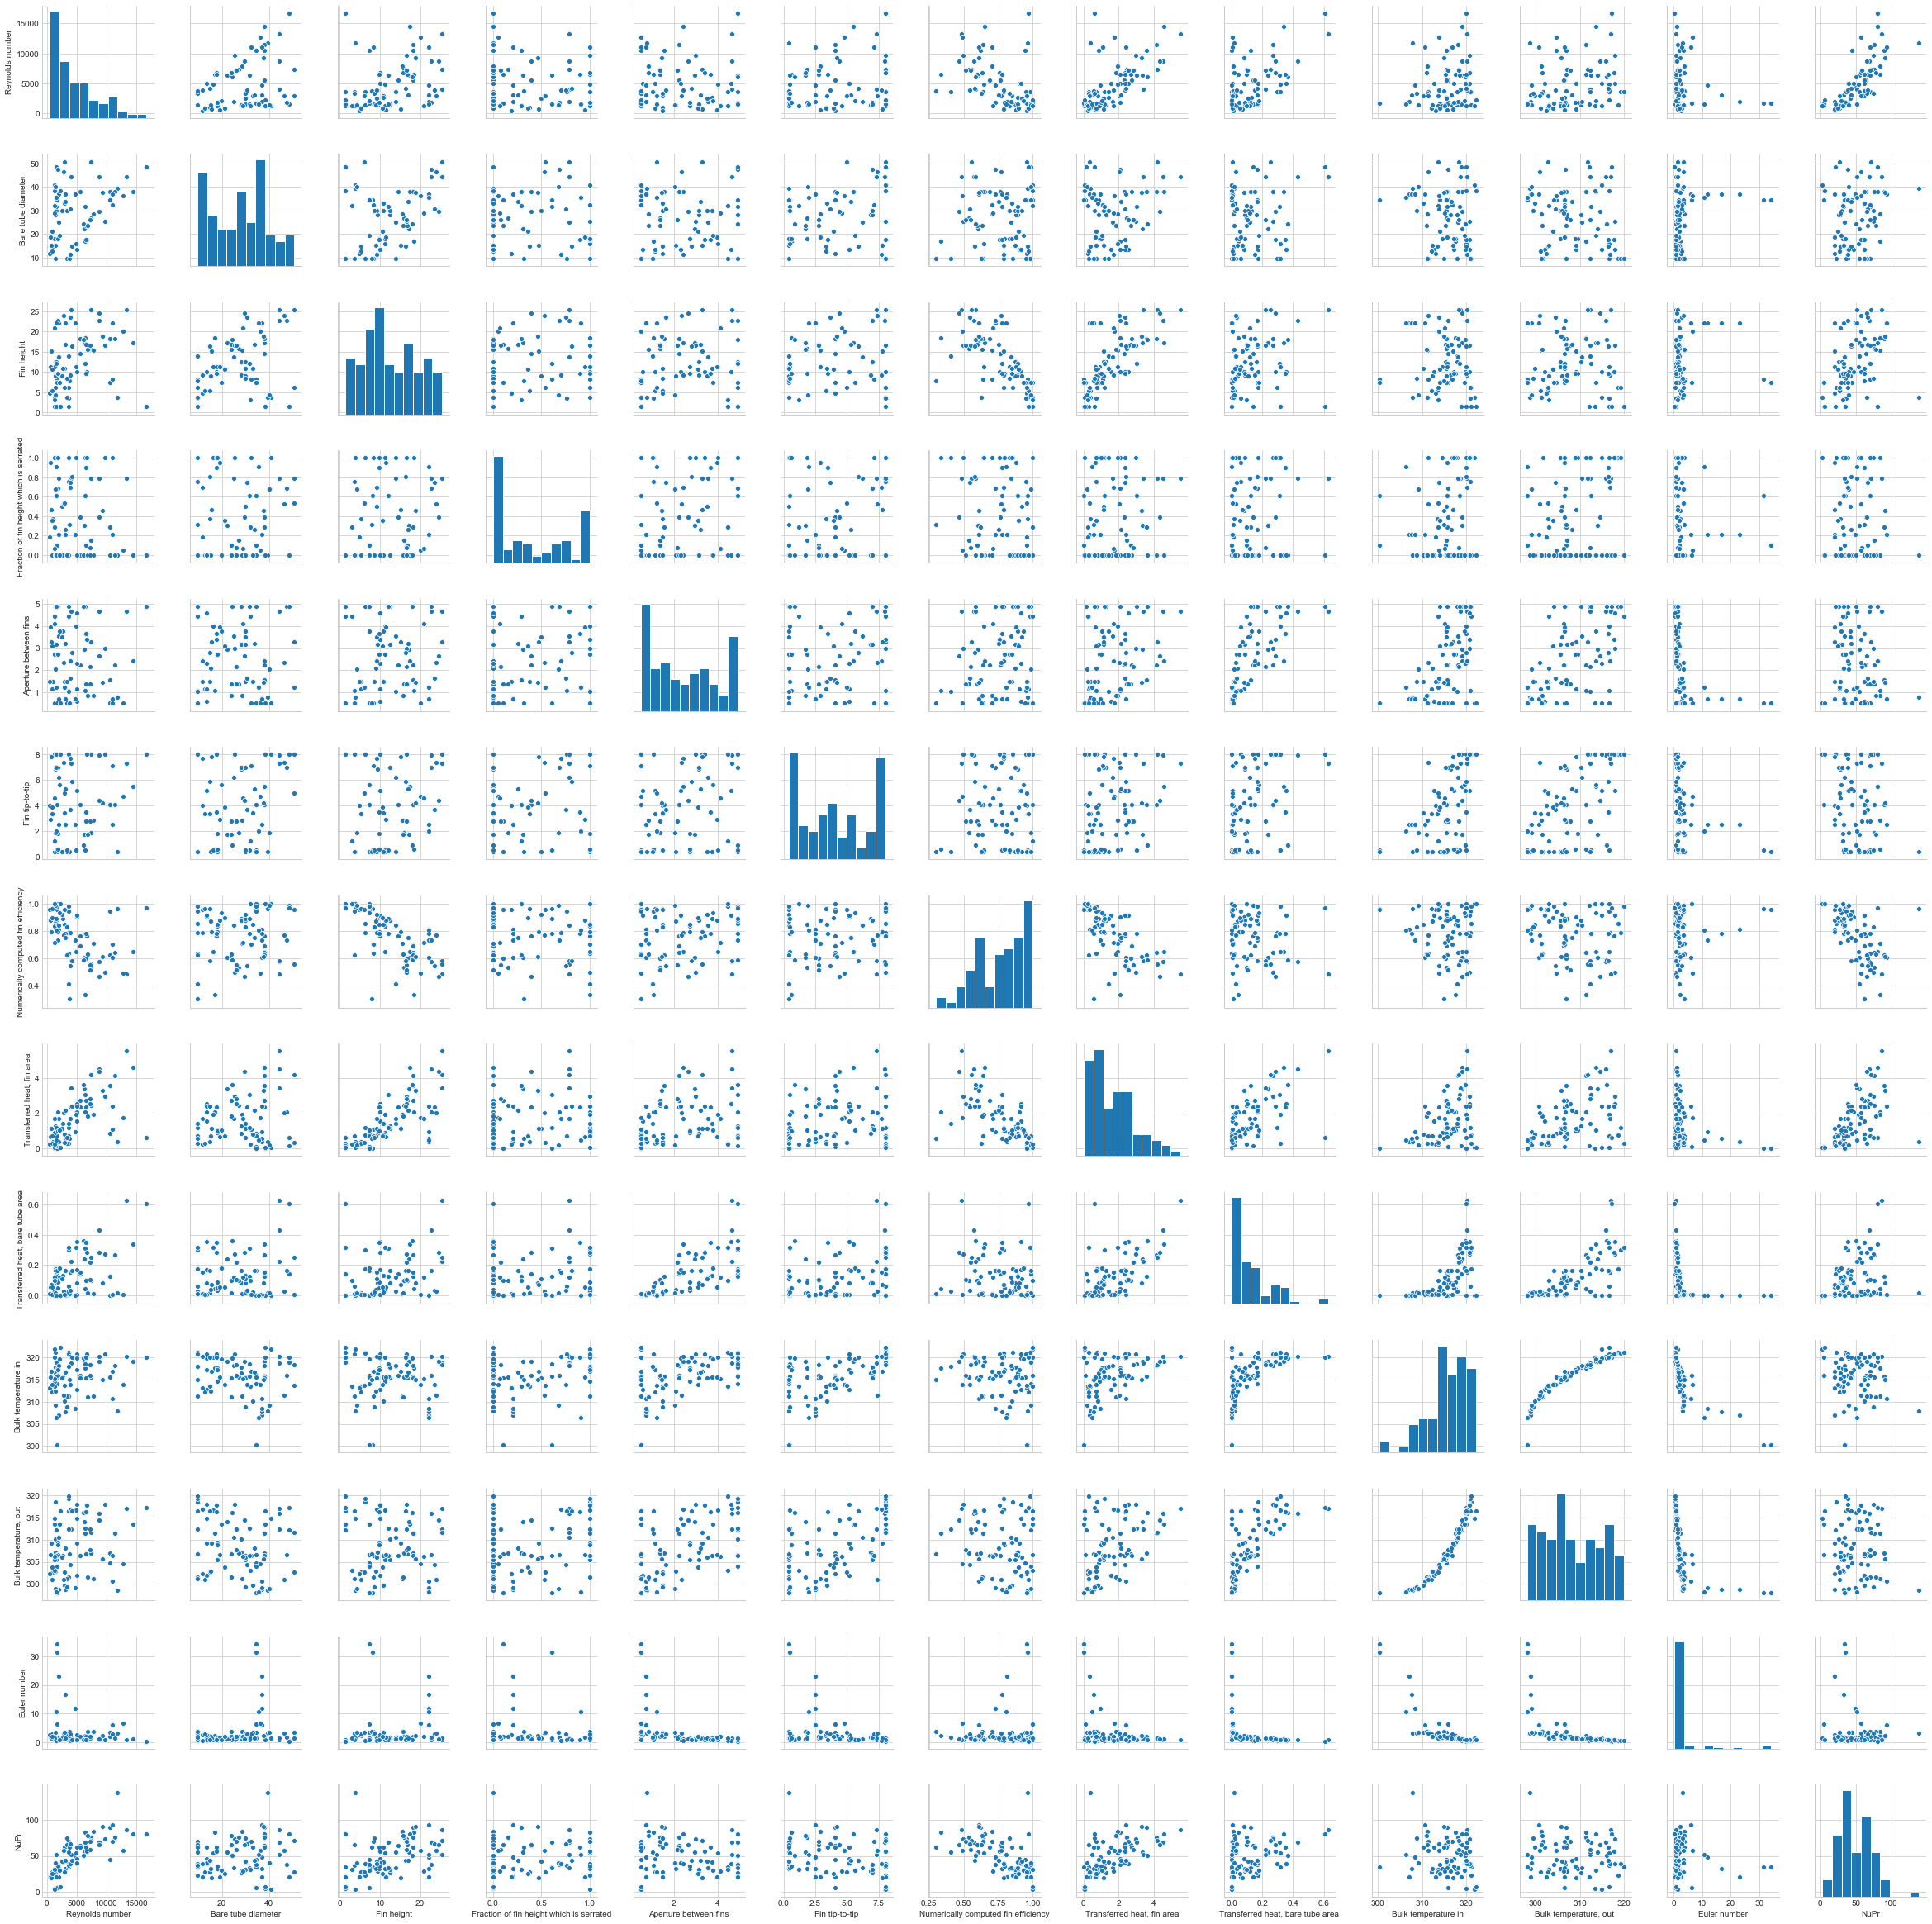

In [162]:
sns.pairplot(df_total)
plt.savefig("pairPlots.png")

(13.5, -0.5)

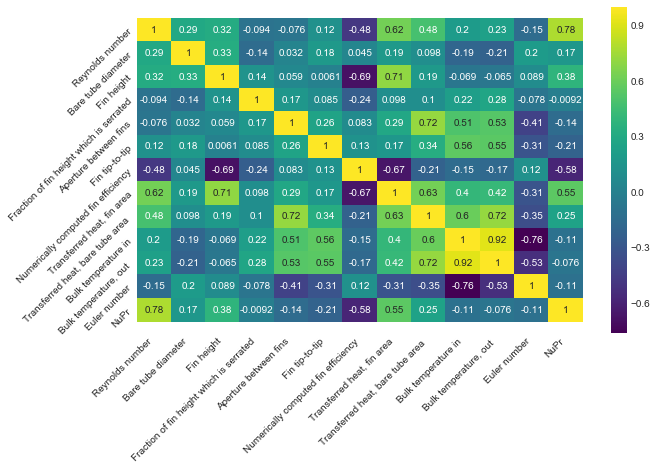

In [163]:
#Quality correlation matrix
k = 13 #number of variables for heatmap
cols = df_total.corr().index
cm = df_total[cols].corr()
plt.figure(figsize=(10,6))
ax=sns.heatmap(cm, annot=True, cmap = 'viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Checking Outliers

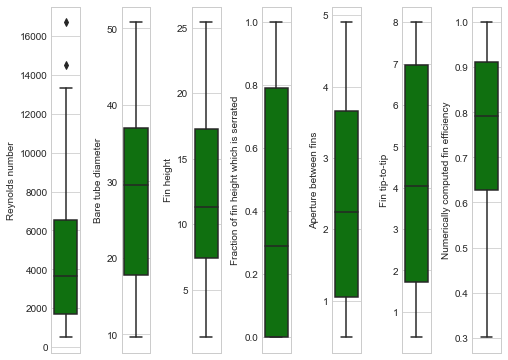

In [164]:
l = df_total.columns.values
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,7):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_total[l[i]],color='green',orient='v')
    plt.tight_layout()

plt.savefig('boxplot.png')

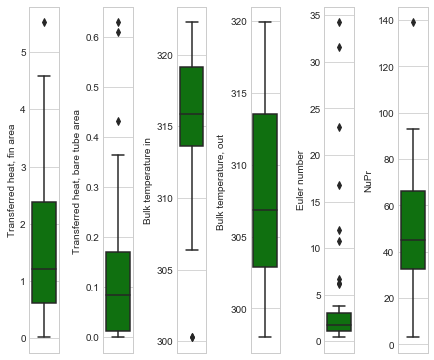

In [165]:
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(7,13):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_total[l[i]],color='green',orient='v')
    plt.tight_layout()

plt.savefig('boxplot.png')

# Removing outliers

In [166]:
df_total.shape

(85, 13)

In [167]:
Q1 = df_total.quantile(0.25)
Q3 = df_total.quantile(0.75)
IQR = Q3 - Q1

In [168]:
df_total = df_total[~((df_total < (Q1-1.5 * IQR)) |(df_total > (Q3 + 1.5 * IQR))).any(axis=1)]
df_total.shape

(71, 13)

# Check distribution-skewness 

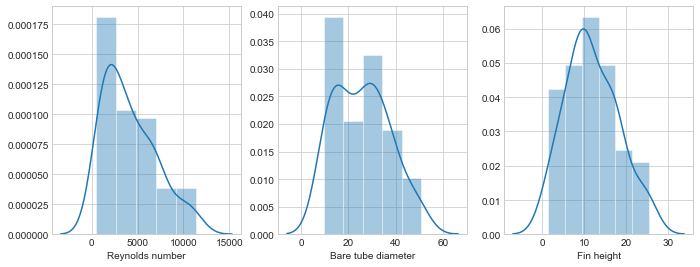

In [169]:
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(0,3):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_total[l[i]],kde=True)

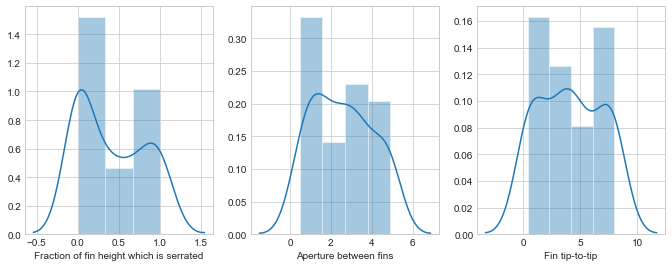

In [170]:
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(3,6):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_total[l[i]],kde=True)

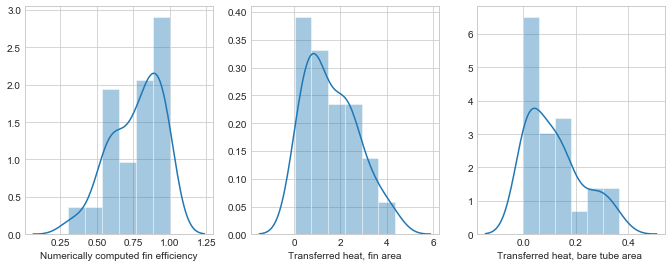

In [171]:
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(6,9):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_total[l[i]],kde=True)

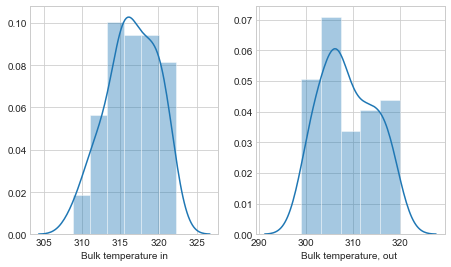

In [172]:
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(9,11):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_total[l[i]],kde=True)

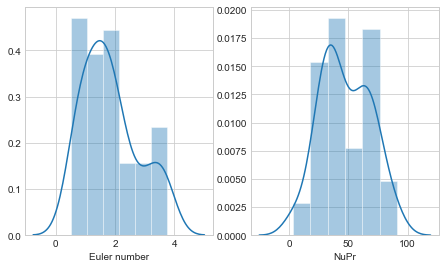

In [173]:
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(11,13):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_total[l[i]],kde=True)

## Find a correlation law for NuPr-1/3

In [174]:
y = df_total.NuPr ## on garde la colomne NuPr comme y
X = df_total.drop(['Euler number', 'NuPr'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

## first LinearRegression

In [175]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=12345) ## On split notre data-set en 2
## 80% pour entrainer et 20% pour tester

In [180]:
X_train.shape

(56, 11)

In [181]:
from sklearn.linear_model import LinearRegression

In [185]:
lm = LinearRegression(fit_intercept=True, normalize=True) #on fait une regression lineaire donc on ne trouvera que des correlations lineaires

In [186]:
# The code fits the linear regression model on the training data.
lm.fit(X_train, y_train) ## on cherche la correlation sur le data-set du train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [187]:
X_train.head()

,Reynolds number,Bare tube diameter,Fin height,Fraction of fin height which is serrated,Aperture between fins,Fin tip-to-tip,Numerically computed fin efficiency,"Transferred heat, fin area","Transferred heat, bare tube area",Bulk temperature in,"Bulk temperature, out"
38,2247.915084,38.511,1.40,0.00,0.49000,8.000,1.000000,0.047556,0.000275,322.264516,316.590658
2,9262.896503,37.700,18.90,0.46,1.46000,4.200,0.609391,3.306099,0.082708,315.027845,305.766550
6,3892.320047,30.600,23.60,0.75,1.63000,3.700,0.543692,2.354537,0.031136,313.817133,304.347825
29,10557.584190,34.680,7.35,0.00,0.49004,4.058,0.945835,0.849867,0.001677,315.482492,304.691240
32,3668.726024,9.650,1.40,0.00,4.45000,8.000,0.981076,0.274412,0.317400,321.258794,319.923316


In [188]:
lm.coef_ ## beta-coefficient

array([ 3.45378082e-03,  1.61715638e-01, -1.17388246e+00,  5.39248882e+00,
        3.30628284e-01,  2.79245918e-01, -5.21562859e+01,  7.23072250e+00,
       -9.58112763e+00, -7.79644505e+00,  2.76072822e+00])

In [189]:
lm.intercept_

1683.0225208991985

In [190]:
## p-values associé a chaque beta: est ce que les coefficients que je vois ci dessus sont ils significative de manière probabilistique
## p-value < 0.05 (alpha =0.05)

import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
pvaluenupr = sm.OLS(y_train, X2_train)
pvaluenupr2 = pvaluenupr.fit()
print(pvaluenupr2.summary())

                            OLS Regression Results                            
Dep. Variable:                   NuPr   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     46.78
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.31e-20
Time:                        14:13:44   Log-Likelihood:                -179.01
No. Observations:                  56   AIC:                             382.0
Df Residuals:                      44   BIC:                             406.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

C:\Users\Taha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [191]:
lm.score(X_train, y_train)

0.9212254787422186

Text(0.5, 1.0, 'Betas coefficients from linear regression for each feature i.e. independent variable')

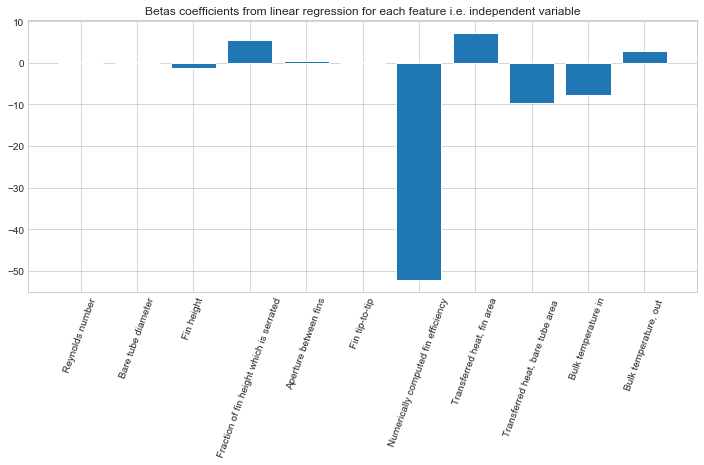

In [78]:
plt.subplots(figsize=(12,5))
plt.bar(x=X.columns, height=lm.coef_)
plt.xticks(rotation=70)
plt.title("Betas coefficients from linear regression for each feature i.e. independent variable")

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression
lm_standardized_coefficients=LinearRegression()
lm_standardized_coefficients.fit(X_train, y_train)
lm_standardized_coefficients.score(X_test, y_test)

0.8271652158712687

Text(0.5, 1.0, 'Standardized betas coefficients from linear regression for each feature i.e. independent variable')

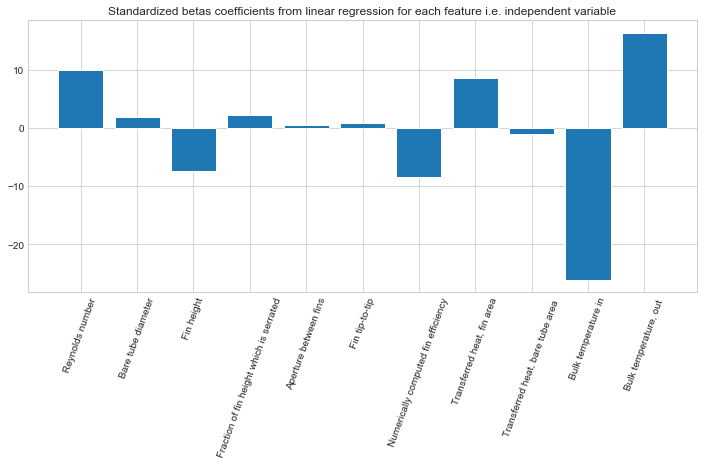

In [192]:
plt.subplots(figsize=(12,5))
plt.bar(x=X.columns, height=lm_standardized_coefficients.coef_)
plt.xticks(rotation=70)
plt.title("Standardized betas coefficients from linear regression for each feature i.e. independent variable")

In [193]:
predictions = lm.predict(X_test)

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


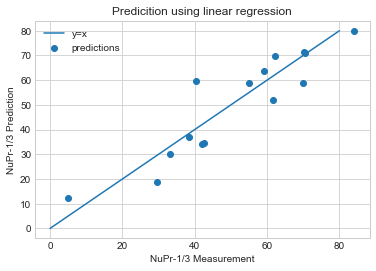

<Figure size 432x288 with 0 Axes>

In [200]:
#plotting predictions vs measurements and linear function
plt.scatter(y_test,predictions,label='predictions')
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 80, 1000)
ax = plt.axes()
ax.plot(x, x,label='y=x');
plt.title('Predicition using linear regression')
plt.ylabel('NuPr-1/3 Prediction')
plt.xlabel('NuPr-1/3 Measurement')
plt.legend(loc="upper left")
plt.show()
plt.savefig("linearregpred.png")

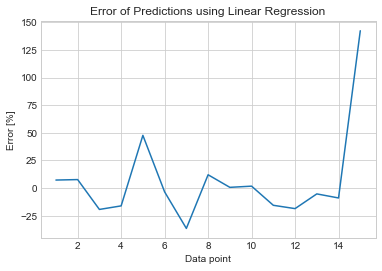

<Figure size 432x288 with 0 Axes>

In [204]:
error_reglin=(predictions-y_test)/y_test*100
x = np.linspace(1,15,15)
plt.style.use('seaborn-whitegrid')
plt.plot(x,error_reglin)
plt.title('Error of Predictions using Linear Regression')
plt.ylabel('Error [%]')
plt.xlabel('Data point')
plt.show()
plt.savefig("linearregprederror.png")

# data transformation & feature creation

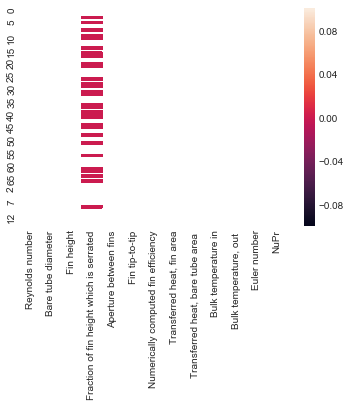

In [213]:
sns.heatmap(df_total[df_total==0])

# il faut enlever fin height car trop de valeur nul et ça va poser probleme 
# avec les features log et puissance negative

In [246]:
df = pd.read_csv("./supplementaryMaterial0.csv", skiprows=16, sep=' ', header=None, names=cols)
df_test=pd.read_csv("./supplementaryMaterial1.csv", skiprows=29, sep=' ',header=None, names=cols)
df_total = pd.concat([df, df_test])

y_nofeature = df_total.NuPr ## on garde la colomne NuPr comme y
X_nofeature = df_total.drop(['Euler number', 'NuPr','Fraction of fin height which is serrated'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

In [247]:
y_nofeature = df_total.NuPr ## on garde la colomne NuPr comme y
X_nofeature = df_total.drop(['Euler number', 'NuPr','Fraction of fin height which is serrated'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

In [248]:
X_nofeature

,Reynolds number,Bare tube diameter,Fin height,Aperture between fins,Fin tip-to-tip,Numerically computed fin efficiency,"Transferred heat, fin area","Transferred heat, bare tube area",Bulk temperature in,"Bulk temperature, out"
0,5598.842923,38.050000,14.6000,2.2450,4.05,0.766054,2.331958,0.139473,315.886064,306.526348
1,6463.062391,17.000000,18.4000,1.0500,0.60,0.335254,2.078704,0.040821,317.551916,311.452741
2,2000.006289,37.000000,22.1000,0.7100,2.50,0.812148,0.363164,0.000258,307.063115,298.754972
3,1421.189643,28.090000,9.3425,3.1550,6.89,0.891836,0.845530,0.084156,316.560078,307.105294
4,980.827381,14.914818,5.3400,1.4665,3.36,0.964580,0.365255,0.016127,313.524052,302.660292
...,...,...,...,...,...,...,...,...,...,...
12,4167.001727,15.000000,16.4000,2.7900,5.90,0.579187,2.395959,0.163971,319.976549,316.427392
13,3041.991679,33.800000,16.9000,3.2100,5.30,0.753838,2.145125,0.165900,316.714736,308.129969
14,2939.234522,50.600000,6.1000,1.2300,5.00,0.955498,0.360236,0.003795,313.652713,302.759932
15,849.870519,21.300000,10.7000,3.0900,3.90,0.895387,0.697197,0.053310,313.949923,303.909820


In [249]:
X_log=X_nofeature.copy()
for column in X_nofeature.columns:
    X_log["LOG_"+column] = np.log(X_nofeature[column]+1)

i=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_log.drop(X_log.columns[i], axis=1)

,LOG_Reynolds number,LOG_Bare tube diameter,LOG_Fin height,LOG_Aperture between fins,LOG_Fin tip-to-tip,LOG_Numerically computed fin efficiency,"LOG_Transferred heat, fin area","LOG_Transferred heat, bare tube area",LOG_Bulk temperature in,"LOG_Bulk temperature, out"
0,8.630494,3.664843,2.747271,1.177115,1.619388,0.568748,1.203560,0.130566,5.758542,5.728561
1,8.774013,2.890372,2.965273,0.717840,0.470004,0.289122,1.124509,0.040010,5.763785,5.744453
2,7.601405,3.637586,3.139833,0.536493,1.252763,0.594513,0.309808,0.000258,5.730305,5.702965
3,7.259953,3.370394,2.336262,1.424312,2.065596,0.637548,0.612766,0.080802,5.760667,5.730442
4,6.889416,2.767251,1.846879,0.902800,1.472472,0.675278,0.311341,0.015998,5.751061,5.715910
...,...,...,...,...,...,...,...,...,...,...
12,8.335192,2.772589,2.856470,1.332366,1.931521,0.456910,1.222586,0.151837,5.771368,5.760249
13,8.020596,3.549617,2.884801,1.437463,1.840550,0.561807,1.145854,0.153493,5.761154,5.733762
14,7.986245,3.943522,1.960095,0.802002,1.791759,0.670645,0.307658,0.003788,5.751470,5.716238
15,6.746260,3.104587,2.459589,1.408545,1.589235,0.639423,0.528978,0.051938,5.752414,5.720016


In [250]:
X_power=X_nofeature.copy()
#np.arange(-1, 1, 0.1)
for column in X_nofeature.columns:
    for puissance in np.linspace(-1,1,21): 
        X_power["POWER_"+str(puissance )+column] = np.power(X_nofeature[column],puissance)
        
i=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X_power.drop(X_power.columns[i], axis=1)

,POWER_-1.0Reynolds number,POWER_-0.9Reynolds number,POWER_-0.8Reynolds number,POWER_-0.7Reynolds number,POWER_-0.6Reynolds number,POWER_-0.5Reynolds number,POWER_-0.3999999999999999Reynolds number,POWER_-0.29999999999999993Reynolds number,POWER_-0.19999999999999996Reynolds number,POWER_-0.09999999999999998Reynolds number,...,"POWER_0.10000000000000009Bulk temperature, out","POWER_0.20000000000000018Bulk temperature, out","POWER_0.30000000000000004Bulk temperature, out","POWER_0.40000000000000013Bulk temperature, out","POWER_0.5Bulk temperature, out","POWER_0.6000000000000001Bulk temperature, out","POWER_0.7000000000000002Bulk temperature, out","POWER_0.8Bulk temperature, out","POWER_0.9000000000000001Bulk temperature, out","POWER_1.0Bulk temperature, out"
0,0.000179,0.000423,0.001004,0.002379,0.005638,0.013364,0.031678,0.075088,0.177984,0.421881,...,1.772747,3.142632,5.571092,9.876137,17.507894,31.037068,55.020872,97.538090,172.910366,306.526348
1,0.000155,0.000372,0.000895,0.002151,0.005173,0.012439,0.029911,0.071923,0.172947,0.415869,...,1.775576,3.152669,5.597803,9.939324,17.648024,31.335404,55.638384,98.790168,175.409432,311.452741
2,0.000500,0.001069,0.002287,0.004890,0.010456,0.022361,0.047818,0.102256,0.218672,0.467624,...,1.768201,3.126533,5.528337,9.775209,17.284530,30.562515,54.040654,95.554713,168.959894,298.754972
3,0.000704,0.001454,0.003005,0.006211,0.012835,0.026526,0.054820,0.113293,0.234137,0.483877,...,1.773082,3.143818,5.574247,9.883595,17.524420,31.072227,55.093595,97.685441,173.204261,307.105294
4,0.001020,0.002030,0.004043,0.008052,0.016034,0.031930,0.063586,0.126626,0.252163,0.502158,...,1.770498,3.134665,5.549919,9.826123,17.397135,30.801599,54.534183,96.552685,170.946377,302.660292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.000240,0.000552,0.001271,0.002925,0.006731,0.015491,0.035651,0.082045,0.188814,0.434528,...,1.778392,3.162677,5.624478,10.002525,17.788406,31.634753,56.258980,100.050499,177.928970,316.427392
13,0.000329,0.000733,0.001635,0.003646,0.008130,0.018131,0.040433,0.090168,0.201080,0.448419,...,1.773672,3.145914,5.579820,9.896772,17.553631,31.134390,55.222207,97.946101,173.724290,308.129969
14,0.000340,0.000756,0.001680,0.003735,0.008300,0.018445,0.040993,0.091102,0.202466,0.449963,...,1.770557,3.134871,5.550467,9.827416,17.399998,30.807683,54.546750,96.578114,170.997027,302.759932
15,0.001177,0.002310,0.004534,0.008901,0.017474,0.034302,0.067338,0.132189,0.259495,0.509407,...,1.771228,3.137249,5.556783,9.842329,17.433009,30.877835,54.691686,96.871447,171.581421,303.909820


In [251]:
X_allfeatures = np.concatenate((X_nofeature, X_log, X_power),axis=1)

In [252]:
X_allfeatures.shape

(85, 250)

In [253]:
from sklearn.model_selection import train_test_split
X_featuretrain, X_featuretest, y_featuretrain, y_featuretest= train_test_split(X_allfeatures,y_nofeature,test_size=0.3,shuffle=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
featurelm=LinearRegression()
featurelm.fit(X_featuretrain, y_featuretrain)
featurelm.score(X_featuretest, y_featuretest)

-7.88594964980642

In [254]:
predictions_feature = featurelm.predict(X_featuretest)

In [255]:
X_featuretrain.shape

(59, 250)

In [256]:
X_featuretest.shape

(26, 250)

In [257]:
y_featuretrain.shape

(59,)

In [258]:
y_featuretest.shape

(26,)

In [259]:
predictions_feature.shape

(26,)

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


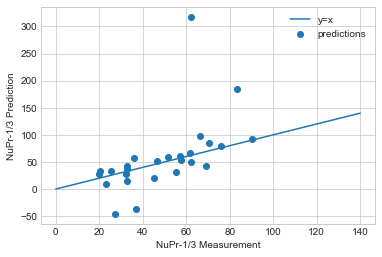

<Figure size 432x288 with 0 Axes>

In [260]:
#plotting predictions vs measurements and linear function
plt.scatter(y_featuretest,predictions_feature,label='predictions')
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 140, 1000)
ax = plt.axes()
ax.plot(x, x,label='y=x');
#plt.title('Predicition using linear regression and features')
plt.ylabel('NuPr-1/3 Prediction')
plt.xlabel('NuPr-1/3 Measurement')
plt.legend(loc="upper right")
plt.show()
plt.savefig("featureregpred.png")

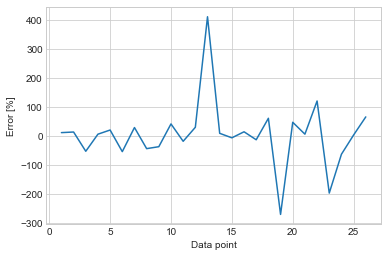

<Figure size 432x288 with 0 Axes>

In [261]:
error_feature=(predictions_feature-y_featuretest)/y_featuretest*100
x = np.linspace(1,26,26)
plt.style.use('seaborn-whitegrid')
plt.plot(x,error_feature)
#plt.title('Error of Predictions using Linear Regression')
plt.ylabel('Error [%]')
plt.xlabel('Data point')
plt.show()
plt.savefig("featureregerror.png")

# Decision-Tree

In [266]:
y = df_total.NuPr ## on garde la colomne NuPr comme y
X = df_total.drop(['Euler number', 'NuPr'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=12345) ## On split notre data-set en 2
## 80% pour entrainer et 80% pour tester

In [267]:
from sklearn.tree import DecisionTreeRegressor

In [268]:
tree_regressor = DecisionTreeRegressor()

In [269]:
tree_regressor.fit(X_train, y_train)
tree_regressor.score(X_test, y_test)

0.5544236502970901

In [270]:
#try to predict NuPr
y_pred = tree_regressor.predict(X_test)

In [271]:
df=pd.DataFrame({'Measured NuPr-1/3':y_test, 'Predicted NuPr-1/3':y_pred})
df

,Measured NuPr-1/3,Predicted NuPr-1/3
58,42.574125,33.258599
35,38.301865,51.355478
0,28.364194,35.826817
60,59.162842,70.386073
39,37.055187,43.541668
45,38.798492,39.108483
4,27.835945,25.281449
26,74.292326,86.699414
10,57.686022,51.355478
2,20.487687,62.652249


In [272]:
y.describe()

count     85.000000
mean      49.506598
std       24.015495
min        3.199433
25%       32.584328
50%       45.165784
75%       66.272949
max      139.021774
Name: NuPr, dtype: float64

In [273]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.001499647058825
Mean Squared Error: 164.36862874235186
Root Mean Squared Error: 12.820632930645502


In [274]:
error_decisiontree = (y_pred-y_test)/y_test *100

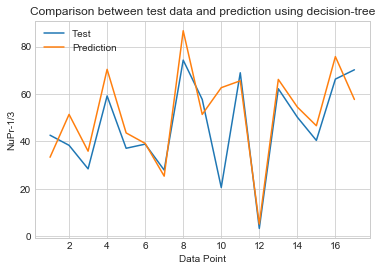

In [275]:
x = np.linspace(1,17,17)
plt.style.use('seaborn-whitegrid')
plt.plot(x,y_test)
plt.plot(x,y_pred)
plt.title('Comparison between test data and prediction using decision-tree')
plt.ylabel('NuPr-1/3')
plt.xlabel('Data Point')
plt.legend(['Test', 'Prediction'], loc='upper left')
plt.show()

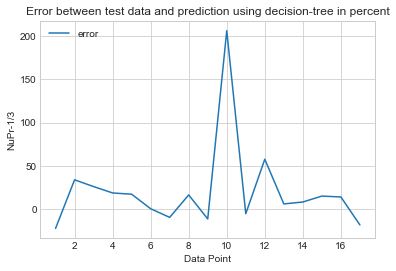

In [276]:
x = np.linspace(1,17,17)
plt.plot(x,error_decisiontree)
plt.style.use('seaborn-whitegrid')
plt.title('Error between test data and prediction using decision-tree in percent')
plt.ylabel('NuPr-1/3')
plt.xlabel('Data Point')
plt.legend(['error',], loc='upper left')
plt.show()

# Random-Forest Regressor

In [277]:
y = df_total.NuPr ## on garde la colomne NuPr comme y
X = df_total.drop(['Euler number', 'NuPr'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=12345) ## On split notre data-set en 2
## 80% pour entrainer et 80% pour tester

In [278]:
from sklearn.ensemble import RandomForestRegressor

In [279]:
rf = RandomForestRegressor(n_estimators=2000, max_depth=8)

In [280]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8181917849615825

In [281]:
#try to predict NuPr
y_pred = rf.predict(X_test)

In [282]:
df=pd.DataFrame({'Measured NuPr-1/3':y_test, 'Predicted NuPr-1/3':y_pred})
df

,Measured NuPr-1/3,Predicted NuPr-1/3
58,42.574125,38.831280
35,38.301865,39.129408
0,28.364194,35.123638
60,59.162842,70.888489
39,37.055187,41.138260
45,38.798492,48.429640
4,27.835945,26.170942
26,74.292326,71.632026
10,57.686022,43.600405
2,20.487687,35.848786


In [283]:
y.describe()

count     85.000000
mean      49.506598
std       24.015495
min        3.199433
25%       32.584328
50%       45.165784
75%       66.272949
max      139.021774
Name: NuPr, dtype: float64

In [284]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.948307122825325
Mean Squared Error: 67.06721983759759
Root Mean Squared Error: 8.189457847598801


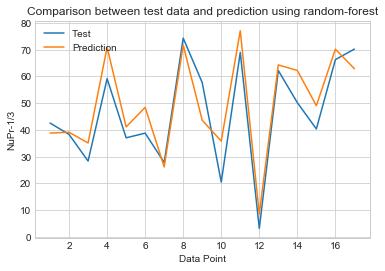

In [285]:
x = np.linspace(1,17,17)
plt.style.use('seaborn-whitegrid')
plt.plot(x,y_test)
plt.plot(x,y_pred)
plt.title('Comparison between test data and prediction using random-forest')
plt.ylabel('NuPr-1/3')
plt.xlabel('Data Point')
plt.legend(['Test', 'Prediction'], loc='upper left')
plt.show()

In [286]:
error_randomforest = (y_pred-y_test)/y_test *100

In [287]:
error_randomforest.head

<bound method NDFrame.head of 58     -8.791361
35      2.160581
0      23.830903
60     19.819277
39     11.018897
45     24.823511
4      -5.981485
26     -3.580855
10    -24.417729
2      74.977222
6      11.770800
13    169.433992
66      3.376229
42     23.949572
57     21.518649
20      5.886724
54    -10.447564
Name: NuPr, dtype: float64>

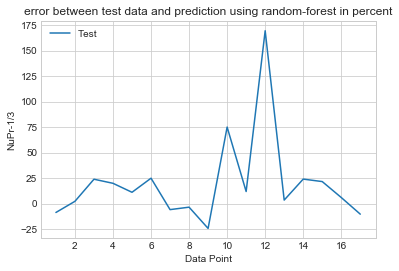

In [288]:
x = np.linspace(1,17,17)
plt.style.use('seaborn-whitegrid')
plt.plot(x,error_randomforest)
plt.title('error between test data and prediction using random-forest in percent')
plt.ylabel('NuPr-1/3')
plt.xlabel('Data Point')
plt.legend(['Test', 'Prediction'], loc='upper left')
plt.show()

## Deep-learning/Neural network (Keras)
https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
https://towardsdatascience.com/get-started-with-deep-learning-using-keras-a45ee421f3ef

In [289]:
y = df_total.NuPr ## on garde la colomne NuPr comme y
X = df_total.drop(['Euler number', 'NuPr'], axis=1) ## on veut une correlation en fonction de toutes les var sauf NuPr et Eu

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=12345) ## On split notre data-set en 2
## 80% pour entrainer et 80% pour tester

In [290]:
from keras.models import Sequential
from keras.layers import Dense
#create model
#The model type that we will be using is Sequential.
#Sequential is the easiest way to build a model in Keras.
#It allows you to build a model layer by layer. 
#Each layer has weights that correspond to the layer the follows it.
model = Sequential()

Using TensorFlow backend.


In [291]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#get number of columns in training data
n_cols = X_train.shape[1]

In [293]:
# define the keras model

#‘Dense’ is the layer type. Dense is a standard layer type that works for 
#most cases. In a dense layer, all nodes in the previous layer connect 
#to the nodes in the current layer.

#‘Activation’ is the activation function for the layer. An activation function
#allows models to take into account nonlinear relationships.
#ReLU or Rectified Linear Activation
model.add(Dense(150, input_dim=n_cols, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

In [294]:
# compile the keras model
# Adam is generally a good optimizer to use for many cases.
#The adam optimizer adjusts the learning rate throughout training.



model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])


In [295]:
# fit the keras model on the dataset
# This is where the training starts. The training data is loaded here.
# The batch size specifies how many training examples are loaded in one iteration
# Epochs are the number of training loops. 
# You might need more or less, depending on your problem.
# Here I validate directly on the test data. 
# This can lead to overfitting but is the fastest way to get good results.

#train model
history = model.fit(X_train, y_train, epochs=300,validation_data = (X_test,y_test), batch_size=64)


Train on 68 samples, validate on 17 samples
Epoch 1/300
68/68 [==============================] - 1s 11ms/step - loss: 3125.4135 - mean_squared_error: 3125.4136 - mean_absolute_error: 50.1008 - mean_absolute_percentage_error: 99.3863 - val_loss: 2437.7754 - val_mean_squared_error: 2437.7754 - val_mean_absolute_error: 45.4744 - val_mean_absolute_percentage_error: 96.4137
Epoch 2/300
68/68 [==============================] - 0s 88us/step - loss: 3067.3317 - mean_squared_error: 3067.3318 - mean_absolute_error: 49.5471 - mean_absolute_percentage_error: 97.7393 - val_loss: 2386.9788 - val_mean_squared_error: 2386.9788 - val_mean_absolute_error: 44.9185 - val_mean_absolute_percentage_error: 93.8641
Epoch 3/300
68/68 [==============================] - 0s 103us/step - loss: 3007.2698 - mean_squared_error: 3007.2698 - mean_absolute_error: 48.9667 - mean_absolute_percentage_error: 96.0173 - val_loss: 2328.6106 - val_mean_squared_error: 2328.6106 - val_mean_absolute_error: 44.2753 - val_mean_absolu

Epoch 26/300
68/68 [==============================] - 0s 132us/step - loss: 325.5820 - mean_squared_error: 325.5820 - mean_absolute_error: 13.9363 - mean_absolute_percentage_error: 51.6142 - val_loss: 294.7069 - val_mean_squared_error: 294.7069 - val_mean_absolute_error: 12.8076 - val_mean_absolute_percentage_error: 92.4711
Epoch 27/300
68/68 [==============================] - 0s 103us/step - loss: 298.7539 - mean_squared_error: 298.7539 - mean_absolute_error: 13.4021 - mean_absolute_percentage_error: 47.2729 - val_loss: 278.2509 - val_mean_squared_error: 278.2509 - val_mean_absolute_error: 12.5429 - val_mean_absolute_percentage_error: 85.5350
Epoch 28/300
68/68 [==============================] - 0s 103us/step - loss: 293.3169 - mean_squared_error: 293.3169 - mean_absolute_error: 13.4832 - mean_absolute_percentage_error: 44.3212 - val_loss: 275.7715 - val_mean_squared_error: 275.7715 - val_mean_absolute_error: 12.7163 - val_mean_absolute_percentage_error: 81.0418
Epoch 29/300
68/68 [==

68/68 [==============================] - 0s 132us/step - loss: 192.4609 - mean_squared_error: 192.4609 - mean_absolute_error: 10.6138 - mean_absolute_percentage_error: 33.3306 - val_loss: 232.1890 - val_mean_squared_error: 232.1890 - val_mean_absolute_error: 11.9230 - val_mean_absolute_percentage_error: 65.5999
Epoch 52/300
68/68 [==============================] - 0s 103us/step - loss: 188.1112 - mean_squared_error: 188.1112 - mean_absolute_error: 10.5235 - mean_absolute_percentage_error: 33.3690 - val_loss: 230.1414 - val_mean_squared_error: 230.1414 - val_mean_absolute_error: 11.8668 - val_mean_absolute_percentage_error: 66.2402
Epoch 53/300
68/68 [==============================] - 0s 88us/step - loss: 184.7951 - mean_squared_error: 184.7951 - mean_absolute_error: 10.4678 - mean_absolute_percentage_error: 33.2668 - val_loss: 230.1425 - val_mean_squared_error: 230.1425 - val_mean_absolute_error: 11.8387 - val_mean_absolute_percentage_error: 66.9270
Epoch 54/300
68/68 [================

68/68 [==============================] - 0s 103us/step - loss: 137.4818 - mean_squared_error: 137.4818 - mean_absolute_error: 9.2570 - mean_absolute_percentage_error: 25.7043 - val_loss: 189.7918 - val_mean_squared_error: 189.7918 - val_mean_absolute_error: 11.3227 - val_mean_absolute_percentage_error: 57.1271
Epoch 77/300
68/68 [==============================] - 0s 103us/step - loss: 136.0724 - mean_squared_error: 136.0724 - mean_absolute_error: 9.2150 - mean_absolute_percentage_error: 25.8826 - val_loss: 190.6119 - val_mean_squared_error: 190.6119 - val_mean_absolute_error: 11.3477 - val_mean_absolute_percentage_error: 57.1329
Epoch 78/300
68/68 [==============================] - 0s 103us/step - loss: 134.1447 - mean_squared_error: 134.1447 - mean_absolute_error: 9.1548 - mean_absolute_percentage_error: 25.9126 - val_loss: 191.0562 - val_mean_squared_error: 191.0562 - val_mean_absolute_error: 11.3600 - val_mean_absolute_percentage_error: 57.2678
Epoch 79/300
68/68 [==================

68/68 [==============================] - 0s 118us/step - loss: 102.9402 - mean_squared_error: 102.9402 - mean_absolute_error: 8.0228 - mean_absolute_percentage_error: 20.6650 - val_loss: 164.0876 - val_mean_squared_error: 164.0876 - val_mean_absolute_error: 10.4766 - val_mean_absolute_percentage_error: 54.6748
Epoch 102/300
68/68 [==============================] - 0s 103us/step - loss: 99.3121 - mean_squared_error: 99.3121 - mean_absolute_error: 7.8794 - mean_absolute_percentage_error: 21.0625 - val_loss: 165.6120 - val_mean_squared_error: 165.6120 - val_mean_absolute_error: 10.3424 - val_mean_absolute_percentage_error: 55.5788
Epoch 103/300
68/68 [==============================] - 0s 103us/step - loss: 97.2858 - mean_squared_error: 97.2858 - mean_absolute_error: 7.7966 - mean_absolute_percentage_error: 21.6480 - val_loss: 167.6920 - val_mean_squared_error: 167.6920 - val_mean_absolute_error: 10.2361 - val_mean_absolute_percentage_error: 56.3512
Epoch 104/300
68/68 [===================

68/68 [==============================] - 0s 103us/step - loss: 90.0685 - mean_squared_error: 90.0685 - mean_absolute_error: 7.2016 - mean_absolute_percentage_error: 20.7204 - val_loss: 162.7525 - val_mean_squared_error: 162.7525 - val_mean_absolute_error: 9.9388 - val_mean_absolute_percentage_error: 53.5306
Epoch 127/300
68/68 [==============================] - 0s 88us/step - loss: 88.9764 - mean_squared_error: 88.9764 - mean_absolute_error: 7.1180 - mean_absolute_percentage_error: 20.5303 - val_loss: 155.3701 - val_mean_squared_error: 155.3701 - val_mean_absolute_error: 9.9050 - val_mean_absolute_percentage_error: 52.7994
Epoch 128/300
68/68 [==============================] - 0s 110us/step - loss: 81.4706 - mean_squared_error: 81.4706 - mean_absolute_error: 6.8626 - mean_absolute_percentage_error: 19.4923 - val_loss: 147.1043 - val_mean_squared_error: 147.1043 - val_mean_absolute_error: 9.8590 - val_mean_absolute_percentage_error: 51.6172
Epoch 129/300
68/68 [=========================

68/68 [==============================] - 0s 147us/step - loss: 52.5062 - mean_squared_error: 52.5062 - mean_absolute_error: 5.4146 - mean_absolute_percentage_error: 13.2503 - val_loss: 143.9093 - val_mean_squared_error: 143.9093 - val_mean_absolute_error: 9.8953 - val_mean_absolute_percentage_error: 47.5982
Epoch 152/300
68/68 [==============================] - 0s 147us/step - loss: 52.5855 - mean_squared_error: 52.5855 - mean_absolute_error: 5.4095 - mean_absolute_percentage_error: 13.4175 - val_loss: 143.2674 - val_mean_squared_error: 143.2674 - val_mean_absolute_error: 9.8687 - val_mean_absolute_percentage_error: 47.4447
Epoch 153/300
68/68 [==============================] - 0s 103us/step - loss: 51.2561 - mean_squared_error: 51.2561 - mean_absolute_error: 5.3458 - mean_absolute_percentage_error: 13.2764 - val_loss: 140.6590 - val_mean_squared_error: 140.6590 - val_mean_absolute_error: 9.7352 - val_mean_absolute_percentage_error: 46.7447
Epoch 154/300
68/68 [========================

68/68 [==============================] - 0s 118us/step - loss: 38.4576 - mean_squared_error: 38.4576 - mean_absolute_error: 4.5762 - mean_absolute_percentage_error: 11.3900 - val_loss: 151.8260 - val_mean_squared_error: 151.8260 - val_mean_absolute_error: 10.4029 - val_mean_absolute_percentage_error: 45.5790
Epoch 177/300
68/68 [==============================] - 0s 103us/step - loss: 38.0474 - mean_squared_error: 38.0474 - mean_absolute_error: 4.5667 - mean_absolute_percentage_error: 11.3056 - val_loss: 152.5350 - val_mean_squared_error: 152.5350 - val_mean_absolute_error: 10.4405 - val_mean_absolute_percentage_error: 45.4998
Epoch 178/300
68/68 [==============================] - 0s 103us/step - loss: 37.1015 - mean_squared_error: 37.1015 - mean_absolute_error: 4.4809 - mean_absolute_percentage_error: 11.0636 - val_loss: 151.7834 - val_mean_squared_error: 151.7834 - val_mean_absolute_error: 10.3892 - val_mean_absolute_percentage_error: 45.2367
Epoch 179/300
68/68 [=====================

68/68 [==============================] - 0s 103us/step - loss: 24.3219 - mean_squared_error: 24.3219 - mean_absolute_error: 3.5114 - mean_absolute_percentage_error: 9.2349 - val_loss: 124.9397 - val_mean_squared_error: 124.9397 - val_mean_absolute_error: 9.7514 - val_mean_absolute_percentage_error: 42.0695
Epoch 202/300
68/68 [==============================] - 0s 103us/step - loss: 24.1833 - mean_squared_error: 24.1833 - mean_absolute_error: 3.6141 - mean_absolute_percentage_error: 9.1060 - val_loss: 132.5505 - val_mean_squared_error: 132.5505 - val_mean_absolute_error: 10.0395 - val_mean_absolute_percentage_error: 44.3605
Epoch 203/300
68/68 [==============================] - 0s 88us/step - loss: 28.3992 - mean_squared_error: 28.3992 - mean_absolute_error: 4.0934 - mean_absolute_percentage_error: 9.8514 - val_loss: 138.3540 - val_mean_squared_error: 138.3540 - val_mean_absolute_error: 10.2335 - val_mean_absolute_percentage_error: 45.1575
Epoch 204/300
68/68 [==========================

68/68 [==============================] - 0s 103us/step - loss: 15.5490 - mean_squared_error: 15.5490 - mean_absolute_error: 2.8040 - mean_absolute_percentage_error: 7.2525 - val_loss: 120.8452 - val_mean_squared_error: 120.8452 - val_mean_absolute_error: 9.5540 - val_mean_absolute_percentage_error: 39.8983
Epoch 227/300
68/68 [==============================] - 0s 103us/step - loss: 16.0641 - mean_squared_error: 16.0641 - mean_absolute_error: 2.7676 - mean_absolute_percentage_error: 7.1064 - val_loss: 120.1591 - val_mean_squared_error: 120.1591 - val_mean_absolute_error: 9.5252 - val_mean_absolute_percentage_error: 40.0420
Epoch 228/300
68/68 [==============================] - 0s 103us/step - loss: 16.1880 - mean_squared_error: 16.1880 - mean_absolute_error: 2.7508 - mean_absolute_percentage_error: 7.0043 - val_loss: 119.7220 - val_mean_squared_error: 119.7220 - val_mean_absolute_error: 9.5345 - val_mean_absolute_percentage_error: 40.2414
Epoch 229/300
68/68 [===========================

68/68 [==============================] - 0s 132us/step - loss: 11.0762 - mean_squared_error: 11.0762 - mean_absolute_error: 2.3276 - mean_absolute_percentage_error: 5.8438 - val_loss: 129.7773 - val_mean_squared_error: 129.7773 - val_mean_absolute_error: 10.0423 - val_mean_absolute_percentage_error: 42.3650
Epoch 252/300
68/68 [==============================] - 0s 103us/step - loss: 10.9389 - mean_squared_error: 10.9389 - mean_absolute_error: 2.3293 - mean_absolute_percentage_error: 5.8127 - val_loss: 129.5694 - val_mean_squared_error: 129.5694 - val_mean_absolute_error: 10.0346 - val_mean_absolute_percentage_error: 41.8349
Epoch 253/300
68/68 [==============================] - 0s 103us/step - loss: 10.7376 - mean_squared_error: 10.7376 - mean_absolute_error: 2.3445 - mean_absolute_percentage_error: 5.8173 - val_loss: 129.1833 - val_mean_squared_error: 129.1833 - val_mean_absolute_error: 10.0193 - val_mean_absolute_percentage_error: 41.2656
Epoch 254/300
68/68 [========================

Epoch 277/300
68/68 [==============================] - 0s 103us/step - loss: 8.4482 - mean_squared_error: 8.4482 - mean_absolute_error: 2.2195 - mean_absolute_percentage_error: 5.5159 - val_loss: 123.0726 - val_mean_squared_error: 123.0726 - val_mean_absolute_error: 9.6682 - val_mean_absolute_percentage_error: 40.0386
Epoch 278/300
68/68 [==============================] - 0s 118us/step - loss: 7.7328 - mean_squared_error: 7.7328 - mean_absolute_error: 2.1175 - mean_absolute_percentage_error: 5.3285 - val_loss: 122.6374 - val_mean_squared_error: 122.6374 - val_mean_absolute_error: 9.6067 - val_mean_absolute_percentage_error: 39.1834
Epoch 279/300
68/68 [==============================] - 0s 103us/step - loss: 7.7489 - mean_squared_error: 7.7489 - mean_absolute_error: 2.1728 - mean_absolute_percentage_error: 5.5010 - val_loss: 121.8561 - val_mean_squared_error: 121.8561 - val_mean_absolute_error: 9.5092 - val_mean_absolute_percentage_error: 38.5315
Epoch 280/300
68/68 [===================

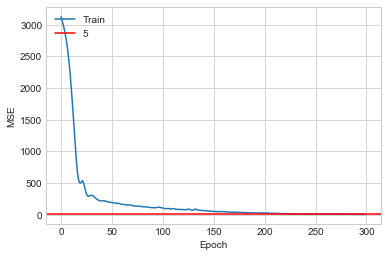

<Figure size 432x288 with 0 Axes>

In [296]:
# graph of model accuracy
plt.plot(history.history['mean_squared_error'])
plt.style.use('seaborn-whitegrid')
#plt.title('MSE using a neural network')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.axhline(y=5, color='r', linestyle='-')
plt.legend(['Train', '5'], loc='upper left')
plt.show()
plt.savefig("mse.png")

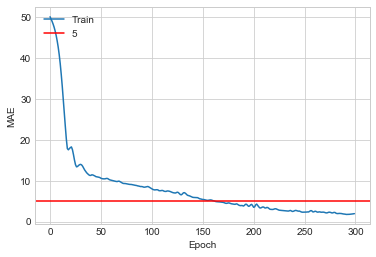

<Figure size 432x288 with 0 Axes>

In [297]:
# graph of model accuracy
plt.plot(history.history['mean_absolute_error'])
plt.style.use('seaborn-whitegrid')
#plt.title('MAE using a neural network')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.axhline(y=5, color='r', linestyle='-')
plt.legend(['Train', '5'], loc='upper left')
plt.show()
plt.savefig("mae.png")

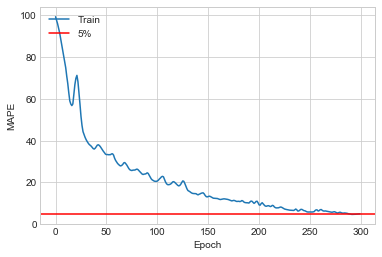

<Figure size 432x288 with 0 Axes>

In [298]:
# graph of model accuracy
plt.plot(history.history['mean_absolute_percentage_error'])
plt.style.use('seaborn-whitegrid')
#plt.title('MAPE using a neural network')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.axhline(y=5, color='r', linestyle='-')
plt.legend(['Train', '5%'], loc='upper left')
plt.show()
plt.savefig("mape.png")